### Multivariate Normal Distribution: Marginals

In [2]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dist = torch.distributions

In [19]:
prior = dist.MultivariateNormal(loc = torch.zeros(2), covariance_matrix=torch.eye(2) + 1.)

In [20]:
prior

MultivariateNormal(loc: torch.Size([2]), covariance_matrix: torch.Size([2, 2]))

In [21]:
xs = torch.linspace(-2., 2., steps=100)
ys = torch.linspace(-2.,2., steps=100)
xx, yy = torch.meshgrid(xs, ys, indexing="xy")

In [22]:
Z_prior = prior.log_prob(torch.vstack((xx.ravel(), yy.ravel())).t()).reshape(xx.shape).exp()

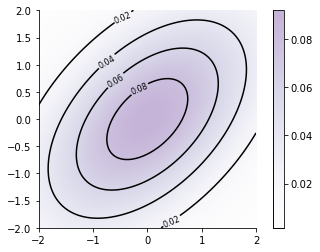

In [23]:
# Code borrowed from https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html
contours = plt.contour(xx, yy, Z_prior, 5, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z_prior, extent=[-2, 2, -2, 2], origin='lower',
           cmap='Purples', alpha=0.3)
plt.colorbar();
sns.despine()

In [47]:
import matplotlib.gridspec as gridspec

In [37]:
marginal_x = dist.Normal(prior.loc[0], prior.covariance_matrix[0, 0])
marginal_y = dist.Normal(prior.loc[1], prior.covariance_matrix[1, 1])



<Figure size 432x288 with 0 Axes>

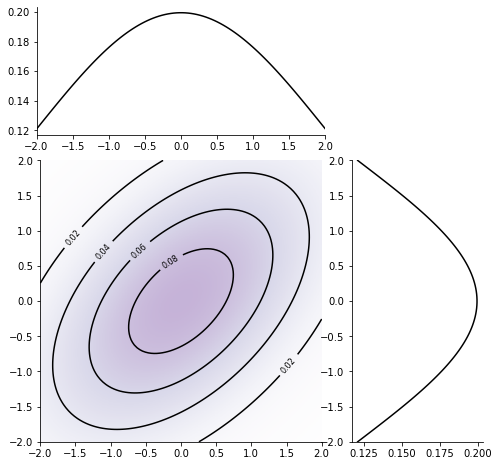

In [59]:
fig = plt.figure()


fig = plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2],sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2],sharey=ax_main)

contours = ax_main.contour(xx, yy, Z_prior, 5, colors='black')
ax_main.clabel(contours, inline=True, fontsize=8)

ax_main.imshow(Z_prior, extent=[-2, 2, -2, 2], origin='lower',
           cmap='Purples', alpha=0.3)
ax_xDist.plot(xs, marginal_x.log_prob(xs).exp().numpy(), color='k')
ax_yDist.plot(marginal_y.log_prob(ys).exp().numpy(), ys, color='k')

sns.despine()